# COVID-19 INDIA Matplotlib Overview

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
#hide
dft_cases = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths = pd.read_csv('data/SnapshotDeaths-28-July.csv')
states=dft_cases['states'].unique()
df = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

In [3]:
#hide
list=df['Date'].unique()
recent_dates1=list[153:]
recent_dates = []
for date in recent_dates1:
    if int(date[5])==0 and int(date[6])==7:
        date2 = f'{date[8]}{date[9]}-Jul-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==8:
        date2 = f'{date[8]}{date[9]}-Aug-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==9:
        date2 = f'{date[8]}{date[9]}-Sep-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==0:
        date2 = f'{date[8]}{date[9]}-Oct-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Nov-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Dec-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Jan-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Feb-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==3:
        date2 = f'{date[8]}{date[9]}-Mar-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==4:
        date2 = f'{date[8]}{date[9]}-Apr-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==5:
        date2 = f'{date[8]}{date[9]}-May-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==6:
        date2 = f'{date[8]}{date[9]}-Jun-{date[2]}{date[3]}'
        recent_dates.append(date2)

In [4]:
#hide
df2=df.groupby('Date')

In [5]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Confirmed
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_cases[recent_dates[i]]=cs    



In [6]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Deceased
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_deaths[recent_dates[i]]=cs    


In [7]:
#hide

dft_cases.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,24-May-21,25-May-21,26-May-21,27-May-21,28-May-21,29-May-21,30-May-21,31-May-21,01-Jun-21,02-Jun-21
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,6853,6878,6901,6917,6936,6964,6984,7005,7018,7043
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,1593821,1609105,1627390,1643557,1657986,1671742,1685142,1693085,1704388,1717156
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,24573,25002,25376,25820,26317,26778,26950,27272,27642,28018
3,Assam,0,0,0,0,0,0,0,0,0,...,375404,381171,386870,392574,398010,403623,406868,411216,415898,420076
4,Bihar,0,0,0,0,0,0,0,0,2,...,692420,695726,698329,700897,702682,704173,705648,706761,707935,709093


In [8]:
#hide
dt_today = dft_cases.columns[-1]
dt_yday = dft_cases.columns[-2]

In [9]:
#hide

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [10]:
#hide
df_table= pd.DataFrame(dft_cases['states'])
df_table = df_table.set_index('states')

df_table['Cases'] = dfc_cases.values
df_table['Deaths'] = dfc_deaths.values
df_table['PCases'] = dfp_cases.values
df_table['PDeaths'] = dfp_deaths.values
df_table

,Cases,Deaths,PCases,PDeaths
states,,,,
Andaman and Nicobar Islands,7043,119,7018,118
Andhra Pradesh,1717156,11132,1704388,11034
Arunachal Pradesh,28018,118,27642,116
Assam,420076,3477,415898,3416
Bihar,709093,5268,707935,5222
Chandigarh,60288,761,60154,758
Daman and Diu,0,0,0,0
Delhi,1427439,24402,1426863,24299
Goa,157275,2693,156569,2671


In [11]:
#hide
df_table = df_table.sort_values(by=['Cases','Deaths'],ascending = [False,False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,5776184,96751,5761015,96198
1,Karnataka,2635122,30017,2618735,29554
2,Kerala,2566001,9223,2546340,9010
3,Tamil Nadu,2148346,25205,2123029,24722
4,Andhra Pradesh,1717156,11132,1704388,11034


In [12]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [13]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,5776184,96751,5761015,96198,15169,553,1.67
1,Karnataka,2635122,30017,2618735,29554,16387,463,1.14
2,Kerala,2566001,9223,2546340,9010,19661,213,0.36
3,Tamil Nadu,2148346,25205,2123029,24722,25317,483,1.17
4,Andhra Pradesh,1717156,11132,1704388,11034,12768,98,0.65


In [14]:
#hide
summary=dict()
summary['updated']=dft_cases.columns[-1]
summary['since']=dft_cases.columns[-2]
summary['Cases']=df_table['Cases'].values.sum()
summary['Deaths']=df_table['Deaths'].values.sum()
summary['PCases']=df_table['PCases'].values.sum()
summary['PDeaths']=df_table['PDeaths'].values.sum()
summary['Cases (+)']=df_table['Cases (+)'].values.sum()
summary['Deaths (+)']=df_table['Deaths (+)'].values.sum()
summary

{'updated': '02-Jun-21',
 'since': '01-Jun-21',
 'Cases': 26216861,
 'Deaths': 313716,
 'PCases': 26094986,
 'PDeaths': 310954,
 'Cases (+)': 121875,
 'Deaths (+)': 2762}

In [15]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [16]:
#hide_input
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [17]:
#hide
dt_cols = []
for i in range(len(dft_cases.columns)):
    dt_cols.append(dft_cases.columns[i])
dt_cols = dt_cols[1:]


In [18]:


#hide
#dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dt_yday, ascending = False,inplace = True)

In [19]:
#hide
dft_ct_new_cases.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,24-May-21,25-May-21,26-May-21,27-May-21,28-May-21,29-May-21,30-May-21,31-May-21,01-Jun-21,02-Jun-21
states,,,,,,,,,,,,,,,,,,,,,
Tamil Nadu,0,0,0,0,1,1,0,3,3,3,...,34867,34285,33764,33361,31079,30016,28864,27936,26513,25317
Kerala,0,5,3,0,0,1,12,12,15,28,...,17821,29803,28798,24166,22318,23513,19894,12300,19760,19661
Karnataka,0,0,1,2,5,1,0,5,6,7,...,25311,22758,26811,24214,22823,20628,20378,16604,14304,16387
Maharashtra,0,18,6,3,3,4,4,12,10,23,...,22122,24136,24752,21273,20740,20295,18600,15077,14123,15169
Andhra Pradesh,0,0,0,0,0,2,0,2,1,1,...,12994,15284,18285,16167,14429,13756,13400,7943,11303,12768


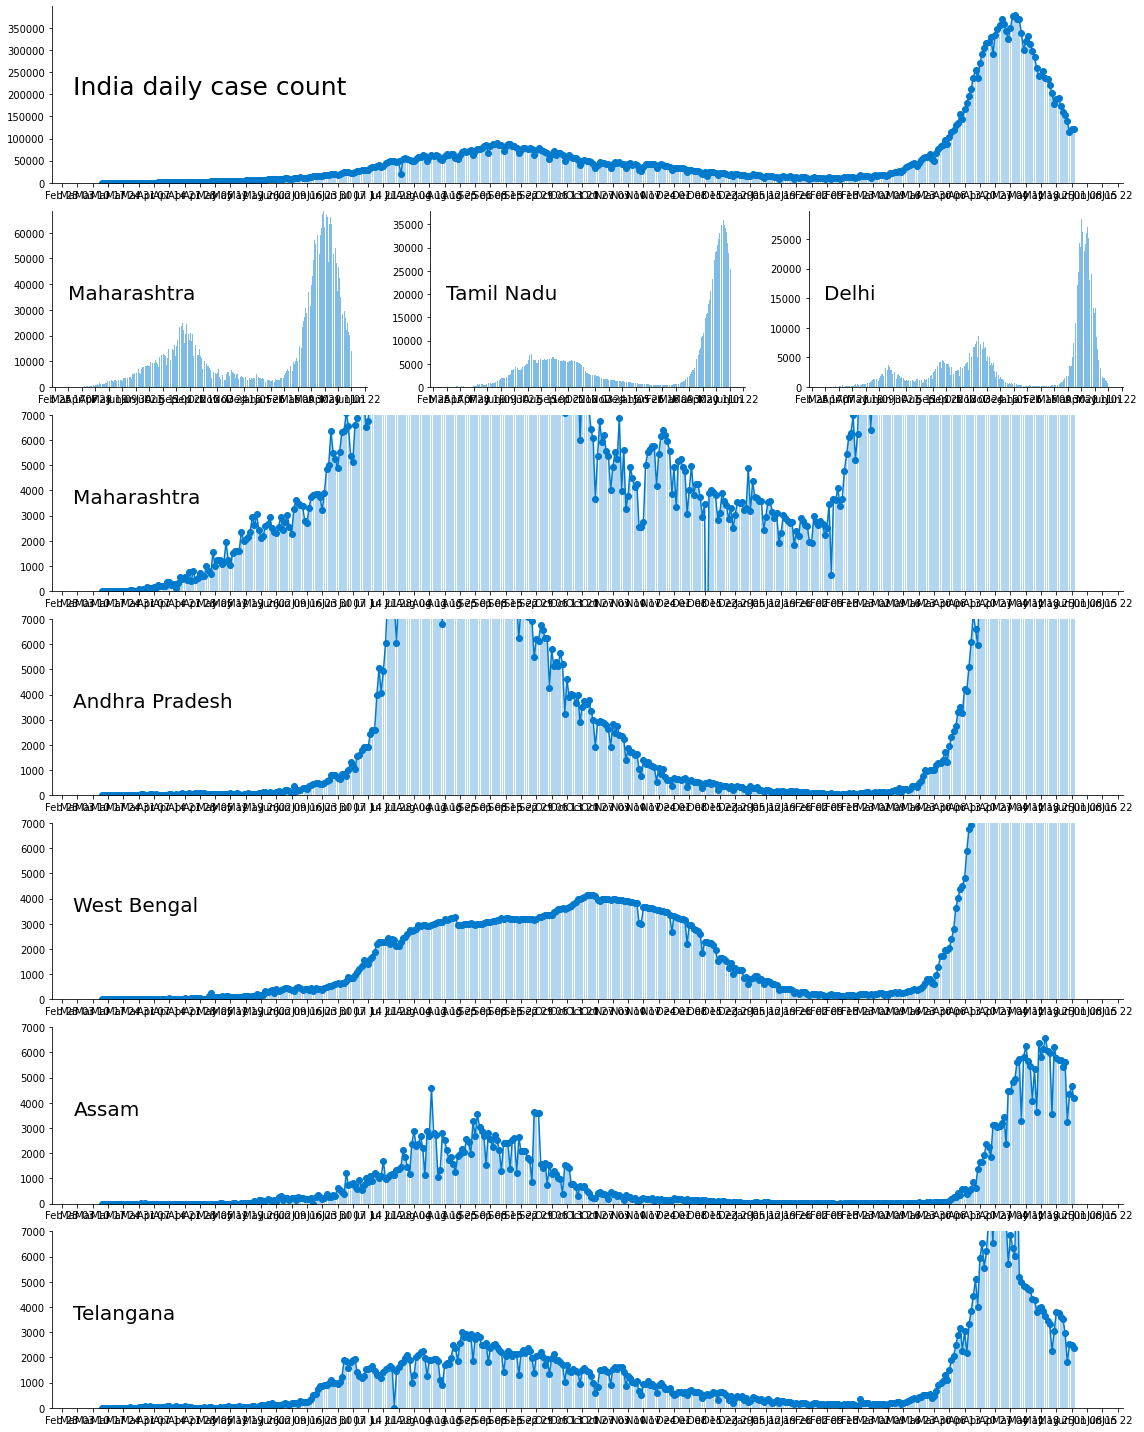

In [20]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [21]:
#hide_input
print(df_table.to_string(index=False))

                      states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                 Maharashtra  5776184   96751  5761015    96198      15169         553           1.67
                   Karnataka  2635122   30017  2618735    29554      16387         463           1.14
                      Kerala  2566001    9223  2546340     9010      19661         213           0.36
                  Tamil Nadu  2148346   25205  2123029    24722      25317         483           1.17
              Andhra Pradesh  1717156   11132  1704388    11034      12768          98           0.65
               Uttar Pradesh  1693992   20787  1692709    20672       1283         115           1.23
                       Delhi  1427439   24402  1426863    24299        576         103           1.71
                 West Bengal  1394724   15813  1385801    15678       8923         135           1.13
                   Rajasthan   942236    8515   940960     8450       1276        